<h1>Invisibilité thermique<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Présentation-du-problème" data-toc-modified-id="Présentation-du-problème-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Présentation du problème</a></span></li><li><span><a href="#Adimensionnement-et-formulation-variationnelle" data-toc-modified-id="Adimensionnement-et-formulation-variationnelle-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Adimensionnement et formulation variationnelle</a></span></li><li><span><a href="#Démarche" data-toc-modified-id="Démarche-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Démarche</a></span></li><li><span><a href="#1D-:-Simulation-du-problème-stationnaire" data-toc-modified-id="1D-:-Simulation-du-problème-stationnaire-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>1D : Simulation du problème stationnaire</a></span><ul class="toc-item"><li><span><a href="#Programme-1-:-Résolution-en-dimension-1" data-toc-modified-id="Programme-1-:-Résolution-en-dimension-1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Programme 1 : Résolution en dimension 1</a></span></li><li><span><a href="#Ordre-numérique-de-la-méthode-$\mathbb{P}1$." data-toc-modified-id="Ordre-numérique-de-la-méthode-$\mathbb{P}1$.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Ordre numérique de la méthode $\mathbb{P}1$.</a></span></li><li><span><a href="#Programme-2-:-Résolution-du-même-problème-en-dimension-2" data-toc-modified-id="Programme-2-:-Résolution-du-même-problème-en-dimension-2-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Programme 2 : Résolution du même problème en dimension 2</a></span></li></ul></li><li><span><a href="#2D-:-Premiers-calculs-de-flux-intégrés" data-toc-modified-id="2D-:-Premiers-calculs-de-flux-intégrés-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>2D : Premiers calculs de flux intégrés</a></span></li><li><span><a href="#2D-:-Simulation-du-problème-stationnaire-avec-conductivité-constante-et-flux-non-constant" data-toc-modified-id="2D-:-Simulation-du-problème-stationnaire-avec-conductivité-constante-et-flux-non-constant-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>2D : Simulation du problème stationnaire avec conductivité constante et flux non constant</a></span></li><li><span><a href="#2D-:-Simulation-du-problème-stationnaire-en-domaine-troué-fixe" data-toc-modified-id="2D-:-Simulation-du-problème-stationnaire-en-domaine-troué-fixe-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>2D : Simulation du problème stationnaire en domaine troué fixe</a></span><ul class="toc-item"><li><span><a href="#Adaptation-de-la-géométrie" data-toc-modified-id="Adaptation-de-la-géométrie-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Adaptation de la géométrie</a></span></li><li><span><a href="#Adaptation-de-la-conductivité" data-toc-modified-id="Adaptation-de-la-conductivité-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Adaptation de la conductivité</a></span></li></ul></li><li><span><a href="#Simulation-du-problème-stationnaire-en-domaine-troué-aléatoirement" data-toc-modified-id="Simulation-du-problème-stationnaire-en-domaine-troué-aléatoirement-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Simulation du problème stationnaire en domaine troué aléatoirement</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Bibliographie" data-toc-modified-id="Bibliographie-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Bibliographie</a></span><ul class="toc-item"><li><span><a href="#FEniCS" data-toc-modified-id="FEniCS-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>FEniCS</a></span></li><li><span><a href="#Markdown" data-toc-modified-id="Markdown-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Markdown</a></span></li></ul></li></ul></div>

**Préliminaire** Les questions "sur papier" sont notées **Q** et les questions de programmation **P**.

# Présentation du problème

![caption](images/domaine1.png)

On va s'intéresser à l'équation de la chaleur sur un rectangle $\Omega=ABCD$ avec conditions aux limites mêlées et de terme source nul :


\begin{equation}\label{eq1:evol}
 \tag{P} \begin{cases}
   \rho c_{p} \partial_t \theta-div(\kappa\ grad(\theta))=0\mbox{ dans  }\Omega,\\
\theta(0,\cdot)=\theta_{0},\\(CL)
\begin{cases}
\kappa \partial_{n}\theta=0 \qquad \mbox{ sur }[AB]\\
 \theta=\theta_{0}\qquad \mbox{ sur }[BC]\\
\kappa_n\partial_{n}\theta=0 \qquad \mbox{ sur }[CD]\\
\kappa_n\partial_{n}\theta=\psi\qquad \mbox{ sur }[DA],\\
\end{cases}
  \end{cases}
\end{equation}


où les valeurs numériques sont


\begin{equation*}
\begin{cases}
X=d(A,B)=d(C,D)=10^{-2}\,m\\
Y=d(B,C)=d(D,A)=20\,m\\
\rho=4000\,kg.m^{-3}\\
c_{p}=1000\,J.kg^{-1}.K^{-1}\\
\theta_{0}=275\,K\\
\psi=
\psi_{0}=100 \, W.m^{-2}\\
\end{cases}
\end{equation*}

et $\kappa:(x,y)\mapsto diag(\kappa_x(x,y),\kappa_y(x,y))$, avec $\kappa_x$ et $\kappa_y$ deux fonctions données. On note $\kappa_n$ la diffusivité sur le bord par analogie avec la notation de la dérivée normale.

Par ailleurs, l'équation d'évolution permet de décrire un régime
transitoire vers un état stationnaire solution de 


\begin{equation}\tag{Pinf}
  \begin{cases}
    -div(\kappa\ grad(\theta))=0\mbox{ dans  }\Omega,\\
(CL)  \end{cases}
\end{equation}

Le but de ce TP est de calculer numériquement la température sur le bord $[DA]$
et le flux de chaleur sur le bord $[BC]$ afin de comprendre comment valider de
manière croisée les simulations numériques et les solutions exactes en dimension 1, puis de calculer efficacement la température dans un domaine troué.

Dans un premier temps, on validera le modèle sur un cas de diffusion unidimensionnel, en $x$, en supposant que $\psi$ est constante égale à $\psi_{0}$, $\kappa=k I_2$ avec $k$ constante égale à $1\, W.m^{-1}.K^{-1}$ et que la température sur le bord $[BC]$ vaut uniformément $\theta_0$. 

**Q.1** Justifier cette affirmation, dans ce cas où $\kappa$, $\psi$ et $\theta_{0}$ sont des fonctions constantes : pourquoi peut-on considérer que la solution $\theta$ ne dépendra pas de $y$ ? 

**Solution** 

$Z:=\partial_{y}\theta$ satisfait à (P) avec une condition initiale nulle ($\theta(0,\cdot)$ ne dépend pas de $y$), une condition au bord de Dirichlet homogène sur $[AB]$, $[BC]$ et $[CD]$, $Z(t,\cdot)|_{[AB],[BC],[CD]}=0$ et une condition de Neumann homogène sur $[DA]$ car 
$$\kappa\partial_{n}Z(t,\cdot)|_{[DA]}=-k\partial_{x}\partial_{y}\theta|_{[DA]}=-k\partial_{y}\partial_{x}\theta|_{[DA]}=\partial_{y}\psi_{0}=0.$$ 

Montrons que $Z:=\partial_{y}\theta$ est nulle.

Si on suppose que pour tout $t\geq0$, $Z(t,\cdot)\in L^{2}(\Omega)$, que
$Z:t\mapsto Z(t,\cdot)$ est continue en $t=0$ et enfin que $Z$ est dérivable en temps, de dérivée $\partial_{t}Z(t)\in L^{2}(\Omega)$, $\forall t>0$,
alors, en étudiant $E:t\mapsto\frac{1}{2}\int_{\Omega}\rho c_{p} Z(t,\cdot)^{2}$ (tout cela sera démontré dans le dernier cours d'EDP !), on a pour $t>0$

\begin{align*}
\dfrac{d}{dt}E(t)&=\int_{\Omega}\rho c_{p}Z(t,\cdot)\partial_{t}Z(t,\cdot)=\int_{\Omega} k Z(t,\cdot)\Delta Z(t,\cdot)\\
&=-\int_{\Omega}k \|\nabla Z(t,\cdot)\|^{2}+\underbrace{\int_{\partial\Omega} k Z(t,\cdot)(\nabla Z(t,\cdot)\cdot n)}_{\underset{\mbox{ et de dérivée normale nulle sur }{\normalsize [DA]}}{=0\mbox{ car }Z=0 \mbox{ sur les bords }[AB],\,[BC],\,[CD]}}\\
&\leq 0.
\end{align*}

La quantité $E$ est donc décroissante. Comme elle est positive en tout temps et qu'elle est nulle en $t=0$, elle est nulle en tout temps. On en déduit que $Z$ est nulle.

Remarquons que l'unicité de la solution de la formulation variationnelle mène à la même conclusion... $\Box$

**Q.2** Réécrire le problème (P) en une dimension d'espace ($x$). On le numérotera (P1).

**Solution** 
  On note $X$ la longueur du segment. 
\begin{equation}\tag{P1}
 \begin{cases}
   \rho c_{p} \partial_t \theta-\partial_x(k\ \partial_{x} \theta)=0\mbox{ dans  }]0,L[,\\
\theta(0,\cdot)=\theta_{0},\\(CL1D)
\begin{cases}
-\kappa \theta'(\cdot,0)=\psi\\
 \theta(\cdot,L)=\theta_{0}\end{cases}
  \end{cases}
  \end{equation} $\Box$

**Q.3** Écrire le système stationnaire associé à (P1) et le résoudre explicitement. On notera $\theta^{\infty}$ la solution. 

**Solution** \begin{equation*}
 \begin{cases}
-\partial_x(k\ \partial_{x} \theta)=0\mbox{ dans  }]0,X[,\\
(CL1D)
\begin{cases}
-k \theta'(0)=\psi\\
 \theta(X)=\theta_{0}\end{cases}
  \end{cases}
  \end{equation*}
Donc $\theta^\infty:x\mapsto \theta_0+\psi (X-x)/k$. $\Box$

#  Adimensionnement et formulation variationnelle

**Q.1** Mettre (P) sous forme adimensionnée par rapport à un temps d'observation $T_{obs}$, une longueur d'observation en $x$, $X_{obs}$, une longueur d'observation en $y$, $Y_{obs}$ et la température $\theta_0$. 

On aura ainsi une équation d'évolution sous la forme

\begin{equation}\label{eq1:evol_adim}
\tag{Padim}\begin{cases}
\partial_{tˆ^{*}}\theta^{*}-\partial_x(\kappa_{x}^{*}\partial_{x^{*}}\theta^{*})-\partial(\kappa_{y}^{*}\partial_{y^{*}}\theta^{*})=0\mbox{ dans }\Omega^{*}\\
(CL)^{*}
\begin{cases}
\kappa^*_n\partial_{n^{*}}\theta^{*}=0 \qquad \mbox{ sur }[A^{*}B^{*}]\\
\theta^{*}=1 \qquad \mbox{ sur }[B^{*}C^{*}]\\
\kappa^*_n\partial_{n^{*}}\theta=0 \qquad \mbox{ sur }[C^{*}D^{*}]\\
\kappa^*_n\partial_{n^{*}}\theta^{*}=\psi^{*} \qquad \mbox{ sur }[D^{*}A^{*}],\\
\end{cases}
\end{cases}
\end{equation}

où les quantités étoilées sont adimensionnées et $\kappa_x^*$, $\kappa_{y}^{*}$ et $\kappa_{n}^{*}$ sont les constantes de diffusivité thermiques adimensionnées dans chaque direction $x$, $y$ et normale au bord.

**Solution** Les quantités sont donc
$\theta=\theta_{0}\theta^{*}$,  
$x=X_{obs}x^{*}$,  
$y=Y_{obs}y^{*}$,  
$\psi^{*}=\psi T_{obs}\theta_{0}/(\rho c_p X_{obs})$,  
$\kappa_{x}^{*}=\kappa_x T_{obs}/(\rho c_{p}X_{obs}^{2})$,  
$\kappa_{y}^{*}=\kappa_x T_{obs}/(\rho c_{p}Y_{obs}^{2})$,  
$\kappa_{n}^{*}=\kappa_{x}^{*}$  
où $\kappa_{n}^{*}=\kappa_{y}^{*}$ suivant la direction de la normale.  
Le domaine adimensionné est $\Omega^*=\ ]0,X_{obs}[\times]0,Y_{obs}[$.

Par souci de simplification, on omet les ${}^{*}$ et ${}_{obs}$ dans la suite. On suppose
désormais que $\psi\in L^2([DA])$.

**Q.2** Écrire le problème stationnaire associé à (Padim). On le nommera (Padiminf).

**Solution** \begin{equation}\tag{Padiminf}
\begin{cases}
-\partial_x(\kappa_{x}\ \partial_{x}\theta)-\partial_y(\kappa_{y}\ \partial_{y}\theta)=0\mbox{ dans }\Omega\\
(CL)
\begin{cases}
-\kappa_y\partial_{y}\theta=0 \qquad \mbox{ sur }[AB]\\
\theta=1 \qquad \mbox{ sur }[BC]\\
\kappa_y\partial_{y}\theta=0 \qquad \mbox{ sur }[CD]\\
-\kappa_x\partial_{x}\theta=\psi \qquad \mbox{ sur }[DA],\\
\end{cases}
\end{cases}
\end{equation}$\Box$

**Q.3** Ecrire la formulation variationnelle de (Padiminf). La solution est-elle unique ?

**Solution** FEniCS intègre naturellement les conditions au bord de type Dirichlet non homogène. Pour montrer le caractère bien posé en rendant le problème homogène, on peut ici faire un relèvement, par exemple dans le cas où $\theta_0\in C^1([0,1])$ et $\kappa\theta_0'\in C^1(\Omega)$ en  prenant $\theta_r:(x,y)\mapsto \theta_0(y)$. On considère alors $\tilde{\theta}=\theta-\theta_r$ qui est solution de 

\begin{equation}
\begin{cases}
-\partial_x(\kappa_{x}\ \partial_{x}\tilde{\theta})-\partial_y(\kappa_{y}\ \partial_{y}\tilde{\theta})=(\kappa_y\theta_0')'\mbox{ dans }\Omega\\
(CL)
\begin{cases}
-\kappa_y(\cdot,0)\partial_{y}\tilde{\theta}=\kappa_y(\cdot,0) \theta_0'(0) \qquad \mbox{ sur }[AB]\\
\theta=0 \qquad \mbox{ sur }[BC]\\
\kappa_y(\cdot,1)\partial_{y}\tilde{\theta}=-\kappa_y(\cdot,1) \theta_0'(1) \qquad \mbox{ sur }[CD]\\
-\kappa_x(0,\cdot)\partial_{x}\tilde{\theta}=\psi \qquad \mbox{ sur }[DA],\\
\end{cases}
\end{cases}
\end{equation}

La condition sur $[DA]$ est inchangée car $\theta_0$ ne dépend que de $y$.

La formulation variationnelle devient
"Trouver $\tilde{\theta}\in H=\{v\in H^{1}(\Omega)\,:\,v|_{[BC]}=0\}$ tel que
$$\forall v\in H,\quad \int_{\Omega}(\kappa_{x}\partial_{x}\tilde{\theta}\ \partial_{x}v+\kappa_{y}\partial_{y}\tilde{\theta}\ \partial_{y}v)-\int_{[DA]}\psi v-\int_{[AB]}\kappa_y(0,\cdot) \theta_0'(0) v-\int_{[CD]}\kappa_y(\cdot,1) \theta_0'(1) v=0."$$ 

La solution cherchée est alors $\theta=\tilde{\theta}+\theta_r$.

$\Box$

#  Démarche

On veut approcher la solution d'un problème d'équations aux dérivées
partielles, dont on sait qu'il est bien posé grâce à l'analyse, à l'aide d'une
méthode éléments finis. 

"Approcher"  peut signifier plusieurs choses :
on veut visualiser, déterminer l'ordre numérique, etc. 

La démarche est la suivante (les étapes sont numérotées Ci pour étape i du code) : 
- C0 : on charge les modules nécessaires ;
- C1 : on définit les constantes ;
- C2 : on part d'une géométrie en définissant les bords par des courbes paramétrées : les bords extérieurs étant parcourus **dans le sens trigonométrique** et les bords intérieurs **dans le sens horaire** ;
- C3 : on fabrique un maillage ;
- C4 : on définit l'espace dans lequel on va chercher la solution approchée ;
- C5 : on prend en compte les conditions au bord ;
- C6 : on définit la formulation variationnelle ;
- C7 : on résout le système ;
- C8: on exploite la solution.

Dans la suite sont fournis des programmes. On les analysera précisément par
rapport aux étapes décrites ci-dessus. 

#  1D : Simulation du problème stationnaire

On détaille dans la première partie de cette section un premier programme permettant de résoudre un problème approché en dimension 1, puis l'objectif est que vous arriviez à écrire vous-même un code de résolution.

## Programme 1 : Résolution en dimension 1

<p style="color:red;">     C0 : Chargement des modules </p>

In [1]:
from dolfin import *

In [2]:
from __future__ import print_function
from fenics import *
import matplotlib.pyplot as plt

<p style="color:red;"> C1 : Définition des constantes </p>

On fixe les constantes, le flux à gauche $\psi$ et la précision $tol$.

In [3]:
kappaadim=1
psiadim=1
tol = 1E-14

<p style="color:red;"> C2 : Définition de la géométrie </p>  

Il s'agit d'un segment de longueur adimensionnée 1.

In [4]:
X=1

<p style="color:red;"> C3 : Fabrication du maillage </p>

Plotting a UnitIntervalmesh1


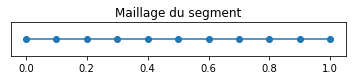

In [5]:
nx1 = 10

mesh1 = UnitIntervalMesh(nx1)

print("Plotting a UnitIntervalmesh1")
plt.figure(1)
plot(mesh1, title="Maillage du segment")

<p style="color:red;"> C4 : Définition de l'espace Hh dans lequel on va chercher la solution </p>

In [6]:
Hh1 = FunctionSpace(mesh1, 'P', 1)

<p style="color:red;"> C5 : Prise en compte des conditions au bord </p>

Les conditions au bord de Dirichlet sont à spécifier grâce à la commande FEniCS DirichletBC. Comme vu en cours, les conditions au bord de Neumann nécessitent de définir une mesure specifique sur la portion de bord concernée. Il faut donc définir les parties de bord comme des objets.

In [7]:
class DirichletBoundary1(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (abs(x[0] - 1) < tol) 

D_boundary1 = DirichletBoundary1()

bcD1 = DirichletBC(Hh1, Constant(1.0), D_boundary1)

class NeumannBoundary1(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (abs(x[0] - 0) < tol)

bcN1 = NeumannBoundary1()

boundaries1 = MeshFunction("size_t", mesh1, mesh1.topology().dim()-1, 0)
bcN1.mark(boundaries1,1)
ds1 = Measure("ds", domain=mesh1, subdomain_data=boundaries1)

<p style="color:red;"> C6 : Codage de la formulation variationnelle </p>

In [8]:
u1 = TrialFunction(Hh1)
v1 = TestFunction(Hh1)
l1 = psiadim*v1*ds1(1)
a1 = kappaadim*dot(grad(u1), grad(v1))*dx

<p style="color:red;"> C7 : Résolution de l'approximation variationnelle (assemblage de la matrice de rigidité et résolution du système linéaire) </p>

In [9]:
u1 = Function(Hh1)
solve(a1 == l1, u1, bcD1)

<p style="color:red;"> C8 : Tracé de la solution </p>

Text(0.5, 0, 'x')

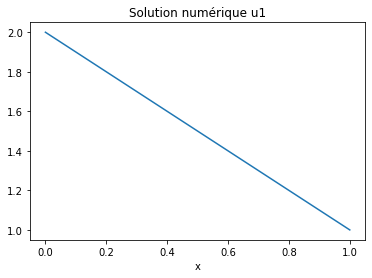

In [10]:
plt.figure(2)
plot(u1,title='Solution numérique u1')
plt.xlabel('x')

**Q.1** Quelle quantité visualise-t-on ? 

**Solution** La température adimensionnée $\theta$. $\Box$

**Q.2** Quel est le problème approché résolu ?

**Solution** Le problème (Padiminf) en dimension 1. $\Box$

## Ordre numérique de la méthode $\mathbb{P}1$. 

**Q.1** Comment valider numériquement l'approximation variationnelle, sachant le résultat de la  Q.6 de la partie 1 ?

**Solution** On définit la fonction thetainf que l'on projette sur le maillage.
Pour mémoire, ici, $\theta^{\infty}:x\mapsto 2-x$ et on calcule la différence. $\Box$

**P.1** Tracer la différence entre la solution du problème approché et la fonction thetainf = Expression("2-x[0]", degree=2). 

Mots-clés FEniCS : *Expression*, *project*

Text(0.5, 0, 'x')

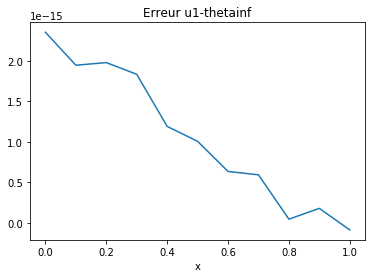

In [11]:
# P_4_2_1
thetainf = Expression("2-x[0]", degree=2)
err=project(u1-thetainf,Hh1)
plu=plot(err)
plt.title('Erreur u1-thetainf')
plt.xlabel('x')

**P.2** Calculer le logarithme en base 10 de la norme $L^2$ et la norme $H^1$ de l'erreur.

Mots-clés FEniCS : *norm*

In [12]:
# P_4_2_2
import math
print("norme L2 de l'erreur=",math.log10(norm(err,'L2')))
print("norme H1 de l'erreur=",math.log10(norm(err,'H1')))

norme L2 de l'erreur= -14.88606517951825
norme H1 de l'erreur= -14.436897275160227


**Q.2** Expliquer ce résultat.

**Solution** La méthode $\mathbb{P}1$ est d'ordre 1 en norme H1, donc l'erreur est d'ordre 1/nx. Mais ici la solution est linéaire, donc la méthode est exacte... comme le montre le fait que l'erreur est d'ordre le zéro-machine.

*Remarque* Il est en général plus prudent de considérer l'erreur relative norm(u-thetainf,'H1')/norm(thetainf,'H1'). Ici, norm(thetainf,'H1') étant d'ordre 1, c'est inutile.

**P.3** On suppose jusqu'à la fin de cette section seulement que la source  $S$ est non nulle. On suppose dans cette question seulement que $S$ est uniforme égale à 1 sur tout le domaine. La solution exacte est alors $\theta_{ex}:x\mapsto \theta^\infty(x) + (1-x^2)/2$. Coder la résolution par la méthode $\mathbb{P}1$ sous forme d'une fonction appelée error_p1 prenant en entrée le nombre de mailles nx et rendant en sortie la norme H1 de l'erreur commise.

Mots-clés FEniCS : *SpatialCoordinate*, *conditional* (langage UFL)

In [13]:
# P_4_2_3
import numpy as np 
def error_p1(nx):
    
    mesh = UnitIntervalMesh(nx)

    x = SpatialCoordinate(mesh)
    
    source = Expression("1", degree=2)
    #source = Expression("-pi*sin(pi*x[0])", degree=2)
    #source = conditional(gt(x[0], 0.5), Constant(8), Constant(0))
    
    Hh = FunctionSpace(mesh, 'P', 1)

    class RightEdge(SubDomain):
        def inside(self, x, on_boundary):
            return on_boundary and (abs(x[0] - 1) < tol) 
    
    re = RightEdge()
    reD = DirichletBC(Hh, Constant(1.0), re)

    class LeftEdge(SubDomain):
        def inside(self, x, on_boundary):
            return on_boundary and (abs(x[0] - 0) < tol)
    
    leN = LeftEdge()

    boundaries = MeshFunction("size_t", mesh, mesh.topology().dim()-1, 0)

    leN.mark(boundaries, 1)

    ds = Measure("ds", domain=mesh, subdomain_data=boundaries)

    u = TrialFunction(Hh)
    v = TestFunction(Hh)
    
    l = v*ds(1) + source*v*dx
    a = inner(grad(u), grad(v))*dx

    u = Function(Hh)

    solve(a == l, u, reD)

    theta_ex = Expression("2.5-x[0]-pow(x[0],2)/2", degree=2)
    #theta_ex = Expression("1-sin(pi*x[0])/pi", degree=3)
    #theta_ex = conditional(gt(x[0], 0.5),-x[0]+3-4*pow(x[0]-0.5,2),-x[0]+3)
    
    err=project(u-theta_ex,Hh)
    
    return norm(err,'H1')

**P.4** Calculer les erreurs commises pour nx = 8, 16, 32, 64, 128, 256, 512 et 1024. Tracer la courbe des résultats en mettant en abscisse le logarithme en base 10 de nx.

[5.20833333e-03 1.30208333e-03 3.25520833e-04 8.13802083e-05
 2.03450521e-05 5.08626302e-06 1.27156576e-06 3.17891439e-07]


Text(0, 0.5, 'erreur')

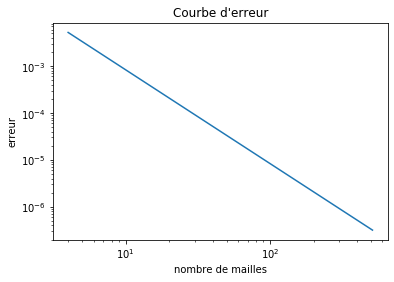

In [14]:
# P_4_2_4
import math

absc = np.array([])
result = np.array([])
for p in range(2,10):
    absc = np.append(absc,[pow(2,p)])
    result = np.append(result,[error_p1(pow(2,p))])
print(result)
plt.loglog(absc,result)
plt.title("Courbe d'erreur")
plt.xlabel("nombre de mailles")
plt.ylabel("erreur")

**P.5** Donner une estimation de l'ordre numérique de la méthode pour ce problème.

In [15]:
# P_4_2_5
# Il suffit de calculer la pente en log-log :
print((math.log(result[3])-math.log(result[1]))/(math.log(absc[3])-math.log(absc[1])))

-1.999999999999308


**P.6** Modifier le programme écrit en P.3 pour inclure les sources & solutions exactes $S:x\mapsto -\pi\sin(\pi x)$ & $\theta_{ex}:x\mapsto  1-\sin(\pi x)/\pi$  et $S:x\mapsto 8 H(x-1/2)$ & $\theta_{ex}:x\mapsto  -x+3-1_{x>1/2}(2x-1)^2$. Conclure.

**Solution** On trouve un ordre très légèrement inférieur à 2 pour les solutions très régulières, et 1.5 pour la solution définie par morceaux, qui est dans $H^2$. Comme on pouvait s'y attendre, l'ordre de la méthode dépend de la régularité des données, ici de la source. On peut imaginer que plus la source sera irrégulière, plus l'ordre sera proche de 1.

## Programme 2 : Résolution du même problème en dimension 2

On revient au problème initial (Padiminf) où la source est nulle. On va maintenant définir la géométrie complète du domaine initial en deux dimensions d'espace.

Voici le code en dimension 2.

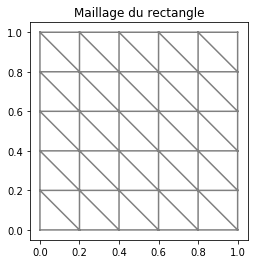

In [16]:
#C0
#from dolfin import *
#from __future__ import print_function
#from fenics import *
#import matplotlib.pyplot as plt

#C1
#kappaadim=1
#psiadim=1
#tol = 1E-14

#C2
#X=1
Y=1

#C3
nx2=5
ny2=5 

mesh2 = RectangleMesh(Point(0.0, 0.0), Point(X, Y), nx2, ny2, diagonal="left") 

plt.figure(1)
plot(mesh2, title="Maillage du rectangle")

#C4
Hh2 = FunctionSpace(mesh2, 'P', 2)

#C5
class RightEdge2(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (abs(x[0] - 1) < tol) 
    
re2 = RightEdge2()
reD2 = DirichletBC(Hh2, Constant(1.0), re2)

class LeftEdge2(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (abs(x[0] - 0) < tol)
    
leN2 = LeftEdge2()

boundaries2 = MeshFunction("size_t", mesh2, mesh2.topology().dim()-1, 0)

leN2.mark(boundaries2, 1)

ds2 = Measure("ds", domain=mesh2, subdomain_data=boundaries2)

**P.1** Ecrire la formulation variationnelle du problème (Padiminf) (étape C6) et tracer la solution.

In [17]:
# P_4_3_1
u2 = TrialFunction(Hh2)
v2 = TestFunction(Hh2)
l2 = psiadim*v2*ds2(1)
a2 = kappaadim*inner(grad(u2), grad(v2))*dx

**P.2** Résoudre l'approximation variationnelle (étape C7).

In [18]:
# P_4_3_2
u2 = Function(Hh2)
solve(a2 == l2, u2, reD2)

**P.3** Tracer la solution (étape C8).

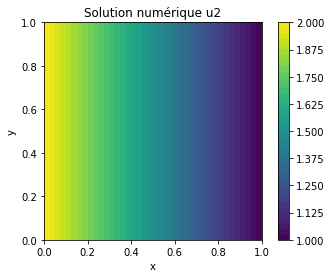

In [19]:
# P_4_3_3
plt.figure(2)
plu=plot(u2)
plt.title('Solution numérique u2')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(plu)

**Q.1** Comment jouer sur le maillage pour se convaincre que la solution ne dépend pas de $y$ ?

**Solution** On peut diminuer le nombre de points intérieurs sur les arêtes $[DA]$ et $[BC]$. $\Box$


**P.4** Comment implémenter la méthode $\mathbb{P}2$ ?

**Solution** En changeant 1 en 2 dans la définition de l'espace Hh2. $\Box$

**P.5** La solution vous paraît-elle visuellement correcte (on pourra tracer le gradient de $u$) ?

Mots-clés FEniCS : *grad*

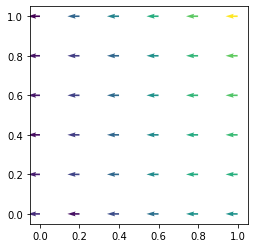

In [20]:
# P_4_3_5
plt.figure(3)
plot(grad(u2))

# 2D : Premiers calculs de flux intégrés

Le flux intégré sur un bord est l'intégrale sur ce bord de la dérivée normale de la température.

**Q.1** Quelle est la valeur du flux intégré en $x=0$ ? 

**Solution** La condition au bord de Neumann sur le bord gauche implique que ce flux vaut
$$\int_{DA}(\kappa_{x}\partial_{x}\theta)(0,y)\cdot(-1)dy=-\int_{DA}(-\psi(y))dy=\int_{X}^{0}\psi(y)dy=-1.$$ $\Box$

**Q.2** Quelle est la valeur du flux intégré en $x=X$ ? 

**Solution** La valeur théorique est $-1$. 
En effet, la formule de Green appliquée à $\int_{\Omega}- div(\mathcal{K} grad(\theta))=0$ avec $\mathcal{K}=diag(\kappa_{x},\kappa_{y})$ donne
\begin{equation*}
0=\int_{\Omega}-div(\mathcal{K} grad(\theta))=\int_{\Omega} grad(1)\cdot(\mathcal{K} grad(\theta))-\int_{\partial\Omega}1(\mathcal{K} grad(\theta)\cdot n)=\int_{DA}\kappa_{x}\partial_{x}\theta\cdot(-1)+\int_{BC}\kappa_{x}\partial_{x}\theta\cdot(1).
\end{equation*}
Donc $$\int_{BC}\kappa_{x}\partial_{x}\theta\cdot(1)=-\int_{DA}\kappa_{x}\partial_{x}\theta\cdot(-1)=-1.$$ $\Box$

**P.1** Ecrire un code permettant de calculer le flux intégré sur le segment [DA], que l'on appellera influx, et le flux intégré sur le segment [BC], que l'on appellera outflux. On calculera la valeur absolue de la différence.

Mots-clés FEniCS : *assemble*, *mark*

In [21]:
# P_5_1
import math

nx3=5
ny3=5

mesh3 = RectangleMesh(Point(0.0, 0.0), Point(X, Y), nx3, ny3, diagonal="left") 

Hh3 = FunctionSpace(mesh3, 'P', 1)

class RightEdge3(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (abs(x[0] - 1) < tol) 
    
re3 = RightEdge3()
reD3 = DirichletBC(Hh3, Constant(1.0), re3)

class LeftEdge3(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (abs(x[0] - 0) < tol)
    
leN3 = LeftEdge3()

boundaries3 = MeshFunction("size_t", mesh3, mesh3.topology().dim()-1, 0)

leN3.mark(boundaries3, 1)

ds3 = Measure("ds", domain=mesh3, subdomain_data=boundaries3)

u3 = TrialFunction(Hh3)
v3 = TestFunction(Hh3)
    
l3 = psiadim*v3*ds3(1)
a3 = kappaadim*inner(grad(u3), grad(v3))*dx

u3 = Function(Hh3)

solve(a3 == l3, u3, reD3)

influx3 = assemble(Dx(u3,0)*ds3(1))

re3.mark(boundaries3, 2)
outflux3 = assemble(Dx(u3,0)*ds3(2))
    
print("difference=",abs(influx3-outflux3))

difference= 8.215650382226158e-15


**Q.3** Conclure.

**Solution** Comme il n'y a pas de source dans le domaine, le flux entrant est bien égal au flux sortant !

#  2D : Simulation du problème stationnaire avec conductivité constante et flux non constant

On introduit une fonction flux $\psi:y\mapsto \psi_{adim}y$.

**P.1** Introduire la fonction $\psi$ dans le programme 2. On tracera le maillage et la solution comme des sous-figures.

Mots-clés matplotlib : *subplot*, *colorbar* 

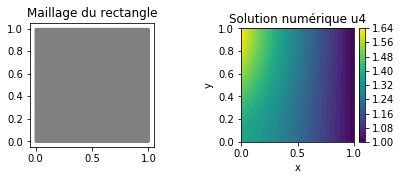

In [22]:
# P_6_1

psi = psiadim*Expression("x[1]", degree=2)

nx4=200
ny4=200 

mesh4 = RectangleMesh(Point(0.0, 0.0), Point(X, Y), nx4, ny4, diagonal="left") 

plt.figure(1)
plt.subplots_adjust(wspace=0.7)
plt.subplot(1, 2, 1)
plot(mesh4, title="Maillage du rectangle")

Hh4 = FunctionSpace(mesh4, 'P', 1)

class RightEdge4(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (abs(x[0] - 1) < tol) 
    
re4 = RightEdge4()
reD4 = DirichletBC(Hh4, Constant(1.0), re4)

class LeftEdge4(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (abs(x[0] - 0) < tol)
    
leN4 = LeftEdge4()

boundaries4 = MeshFunction("size_t", mesh4, mesh4.topology().dim()-1, 0)

leN4.mark(boundaries4, 1)

ds4 = Measure("ds", domain=mesh4, subdomain_data=boundaries4)

u4 = TrialFunction(Hh4)
v4 = TestFunction(Hh4)
l4 = psi*v4*ds4(1)
a4 = kappaadim*inner(grad(u4), grad(v4))*dx

u4 = Function(Hh4)

solve(a4 == l4, u4, reD4)

plt.subplots_adjust(wspace=0.7)
plt.subplot(1, 2, 2)
plu=plot(u4)
plt.title('Solution numérique u4')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(plu,fraction=0.046, pad=0.04)

**P.2** Estimer l'ordre numérique de la méthode $\mathbb{P}1$ et de la méthode $\mathbb{P}2$ pour ce problème. Comme la solution explicite n'est pas connue, on aura choisi nx4 et ny4 grands, par exemple égaux à 200, et on comparera les solutions calculées pour des nx et ny plus petits à la solution obtenue sur le maillage fin mesh4. 

Mots-clés FEniCS : *linregress*

ordre numérique obtenu par régression linéaire : 1.5350246126851883


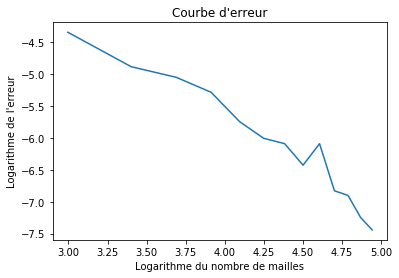

In [23]:
# P_6_2

nxpsi=150
nypsi=150 

def ord_psi(nx,ny,ordre):
    meshpsi = RectangleMesh(Point(0.0, 0.0), Point(X, Y), nx, ny, diagonal="left") 

    Hhpsi = FunctionSpace(meshpsi, 'P', ordre)

    class RightEdgepsi(SubDomain):
        def inside(self, x, on_boundary):
            return on_boundary and (abs(x[0] - 1) < tol) 
    
    repsi = RightEdgepsi()
    reDpsi = DirichletBC(Hhpsi, Constant(1.0), repsi)

    class LeftEdgepsi(SubDomain):
        def inside(self, x, on_boundary):
            return on_boundary and (abs(x[0] - 0) < tol)
    
    leNpsi = LeftEdgepsi()

    boundariespsi = MeshFunction("size_t", meshpsi, meshpsi.topology().dim()-1, 0)

    leNpsi.mark(boundariespsi, 1)

    dspsi = Measure("ds", domain=meshpsi, subdomain_data=boundariespsi)

    upsi = TrialFunction(Hhpsi)
    vpsi = TestFunction(Hhpsi)
    lpsi = psi*vpsi*dspsi(1)
    apsi = kappaadim*inner(grad(upsi), grad(vpsi))*dx

    upsi = Function(Hhpsi)

    solve(apsi == lpsi, upsi, reDpsi)
    
    err=project(upsi-u4,Hh4)
    
    return norm(err,'H1')

abscpsi = np.asarray([])
resultpsi = np.asarray([])
for p in range(2,15):
    abscpsi = np.append(abscpsi,[math.log(p*10)])
    resultpsi = np.append(resultpsi,[math.log(ord_psi(p*10,p*10,1))])

plt.plot(abscpsi,resultpsi)
plt.title("Courbe d'erreur")
plt.xlabel("Logarithme du nombre de mailles")
plt.ylabel("Logarithme de l'erreur")

from scipy.stats import linregress

slope, intercept, r_value, std_err, p_value = linregress(abscpsi,resultpsi)

print("ordre numérique obtenu par régression linéaire :",-slope)

**P.3** Donner le flux thermique sur la face $x=0$ et sur la face $x=X$. Ce résultat était-il prévisible ?

In [24]:
# P_6_3

influx4 = assemble(Dx(u4,0)*ds4(1))

re4.mark(boundaries4, 2)
outflux4 = assemble(Dx(u4,0)*ds4(2))

print("difference=",abs(influx4-outflux4))

difference= 0.002619313528160472


**Solution** Le même raisonnement qu'en Q.5.2 s'applique. Les deux flux doivent être égaux, à discrétisation près ! $\Box$

**Q.3** Conclure.

**Solution** La différence est du même ordre que le pas de discrétisation.

#  2D : Simulation du problème stationnaire en domaine troué fixe

![caption](images/domaine2.png)

## Adaptation de la géométrie

Dans un premier temps, on va considérer que le domaine $\Omega'$ comporte un trou central circulaire **isolé** de rayon $r$ sur le bord duquel on met donc des conditions de Neumann homogènes. 


Afin de pouvoir comparer sur des maillages de même taille de cellule, on fixe maintenant la taille du domaine, la position et la taille du trou, ainsi que le nombre de mailles par côté et l'ordre de la méthode. 

In [25]:
xc=X/2
yc=Y/2
r=0.1

nx5=15
ny5=15
ordre = 1

**P.1** Définir le nouveau domaine et le mailler.

Mots-clés FEniCS : *Rectangle(Point(.,.),Point(.,.))*, *Circle(Point(.,.),.)*, *generate_mesh*

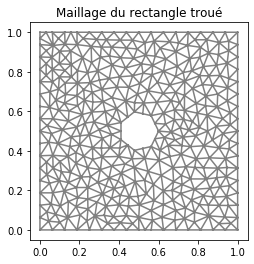

In [26]:
# P_7_1_1

from mshr import *

base = Rectangle(Point(0.0, 0.0), Point(X, Y))
hole = Circle(Point(xc, yc), r)
mesh5 = generate_mesh(base - hole, nx5)

plt.figure(1)
plot(mesh5, title="Maillage du rectangle troué")

**P.2** Résoudre le problème sur le nouveau domaine.

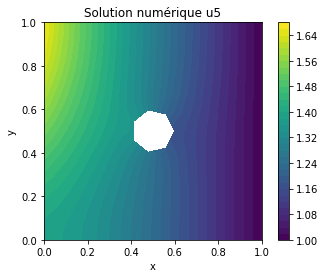

In [27]:
# P_7_1_2
Hh5 = FunctionSpace(mesh5, 'P', ordre)

class RightEdge5(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (abs(x[0] - 1) < tol) 
    
re5 = RightEdge5()
reD5 = DirichletBC(Hh5, Constant(1.0), re5)

class LeftEdge5(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (abs(x[0] - 0) < tol)
    
leN5 = LeftEdge5()

boundaries5 = MeshFunction("size_t", mesh5, mesh5.topology().dim()-1, 0)

leN5.mark(boundaries5, 1)

ds5 = Measure("ds", domain=mesh5, subdomain_data=boundaries5)


u5 = TrialFunction(Hh5)
v5 = TestFunction(Hh5)
l5 = psi*v5*ds5(1)
a5 = kappaadim*inner(grad(u5), grad(v5))*dx

u5 = Function(Hh5)

solve(a5 == l5, u5, reD5)

plu=plot(u5)
plt.title('Solution numérique u5')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(plu)

**P.3** Comparer les flux intégrés sur la face $x=0$ et sur la face $x=L$ obtenus avec des éléments finis $\mathbb{P}1$ puis $\mathbb{P}2$ et commenter le résultat.

In [28]:
# P_7_1_3

influx5 = assemble(Dx(u5,0)*ds5(1))

re5.mark(boundaries5, 2)
outflux5 = assemble(Dx(u5,0)*ds5(2))
print("difference=",abs(outflux5-influx5))

difference= 0.0018527279808397412


## Adaptation de la conductivité

On considère à présent le domaine sans trou $\Omega$ et on introduit une conductivité variable ${\kappa_{var}:(x,y)\mapsto (\kappa-10^{-8})\mathbf{1}_{\{(x,y)\in\Omega \,:\, (x-X/2)^{2}+(y-Y/2)^{2}>r^{2}\}}}+10^{-8}$.

**P.1** Coder la deuxième approche.

Mots-clés FEniCS : *SpatialCoordinate*, *conditional*

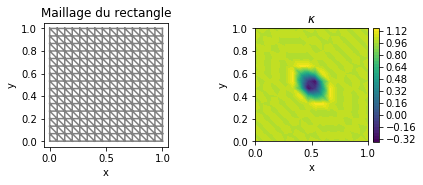

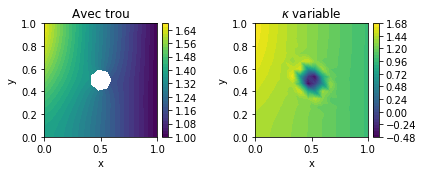

In [29]:
# P_7_2_1

mesh6 = RectangleMesh(Point(0.0, 0.0), Point(X, Y), nx5, ny5, diagonal="left") 

plt.figure(1)
plt.subplots_adjust(wspace=0.7)
plt.subplot(1, 2, 1)
plt.xlabel('x')
plt.ylabel('y')
plot(mesh6, title="Maillage du rectangle")

x = SpatialCoordinate(mesh6)
kappa6 = conditional(gt((x[0]-xc)**2+(x[1]-yc)**2, r**2), kappaadim, Constant(1e-8))

plt.subplot(1, 2, 2)
plk=plot(kappa6,title='$\kappa$')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(plk,fraction=0.046, pad=0.04)

Hh6 = FunctionSpace(mesh6, 'P', ordre)

class RightEdge6(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (abs(x[0] - 1) < tol) 
    
re6 = RightEdge6()
reD6 = DirichletBC(Hh6, Constant(1.0), re6)

class LeftEdge6(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (abs(x[0] - 0) < tol)
    
leN6 = LeftEdge6()

boundaries6 = MeshFunction("size_t", mesh6, mesh6.topology().dim()-1, 0)

leN6.mark(boundaries6, 1)

ds6 = Measure("ds", domain=mesh6, subdomain_data=boundaries6)
            
u6 = TrialFunction(Hh6)
v6 = TestFunction(Hh6)
l6 = psi*v6*ds6(1)
a6 = kappa6*inner(grad(u6), grad(v6))*dx

u6 = Function(Hh6)

solve(a6 == l6, u6, reD6)

w6 = conditional(gt((x[0]-xc)**2+(x[1]-yc)**2, r**2), u6, Constant(0.0))

plt.figure(2)
plt.subplots_adjust(wspace=0.7)
plt.subplot(1, 2, 1)
plu5=plot(u5,title='Avec trou')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(plu5,fraction=0.046, pad=0.04)
plt.subplot(1, 2, 2)
plu6=plot(w6,title='$\kappa$ variable')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(plu6,fraction=0.046, pad=0.04)

**P.2** Calculer la différence des flux intégrés calculés par chacune des deux approches. 

*Remarque* La différence de flux obtenue par
la méthode de conductivité variable est beaucoup plus stable par rapport à la
variation du rayon que la méthode du
changement
de géométrie, qui demande des remaillages et augmente le conditionnement de la matrice. 

In [30]:
# P_7_2_2

influx6 = assemble(Dx(u6,0)*ds6(1))
print("influx6=",influx6)

re6.mark(boundaries6, 2)
outflux6 = assemble(Dx(u6,0)*ds6(2))
print("outflux6=",outflux6)

print("différence : influx5-influx6=",influx5-influx6," ; outflux5-outflux6=",outflux5-outflux6)

influx6= -0.4728761211767581
outflux6= -0.5024175728829038
différence : influx5-influx6= -0.02498135321481082  ; outflux5-outflux6= 0.002707370510495133


**P.3** Créer un autre maillage troué avec un rayon de trou légèrement plus grand et interpoler les solutions u5 et u6 sur ce domaine. Tracer la différence. Conclure.

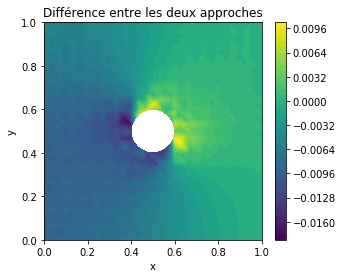

In [31]:
# P_7_2_3
nx7=100
base_compare = Rectangle(Point(0.0, 0.0), Point(X, Y))
hole_compare = Circle(Point(xc, yc), 1.1*r)
mesh7 = generate_mesh(base - hole, nx7)

P7 = FunctionSpace(mesh7, "Lagrange", 2)

v7 = Function(P7)
v7.interpolate(u5)

w7 = Function(P7)
w7.interpolate(u6)

plu7=plot(v7-w7,title='Différence entre les deux approches')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(plu7,fraction=0.046, pad=0.04)

**Q.1** Pourquoi met-on la conductivité à $10^{-8}$ dans le trou ? Essayer avec $0$.

**Solution**

Avec $0$, la coercivité de la forme bilinéaire n'est plus assurée : le système peut ne plus être inversible. En dimension 1, si $\kappa$ s'annule sur les mailles $[x_{i-1},x_{i}]$ et $[x_i,x_{i+1}]$, les coefficients de la ligne i de la matrice de rigidité sont nuls et la matrice n'est donc plus inversible !

# Simulation du problème stationnaire en domaine troué aléatoirement

On veut maintenant simuler le problème dans un domaine dont le nombre de trous, le rayon des trous et les coordonnées de leur centre suivent respectivement une loi de Poisson de paramètre 5, une loi exponentielle de paramètre 5 et une loi normale de moyenne le centre du domaine et de variance 0.1.

In [32]:
param_poisson = 5
scale_exp = 1/5
var_c = 0.1
nx8 = 100
ny8 = 100
ordre = 2

**P.1** Tirer le nombre de trous, leur rayon et les coordonnées de leur centre.

Mots-clés numpy : *poisson*, *exponential*, *normal*

In [33]:
# P_8_1
from numpy import *
nb_holes = random.poisson(param_poisson)
radius = zeros((nb_holes))
xcenter = zeros((nb_holes))
ycenter = zeros((nb_holes))

for i in range(nb_holes):
    radius[i] = random.exponential(scale_exp)
    xcenter[i] = random.normal(xc,var_c)
    ycenter[i] = random.normal(yc,var_c)
    
print("xcenter",xcenter)
print("ycenter",ycenter)
print("radius",radius)

xcenter [0.19584413 0.56063592 0.41988976 0.36187284 0.36265192 0.74927305]
ycenter [0.54676912 0.57576789 0.58515216 0.34172776 0.61758792 0.55164057]
radius [0.20335816 0.0636429  0.14277092 0.48889156 0.19539346 0.40194125]


**P.2** Définir la conductivité adaptée et la tracer.

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


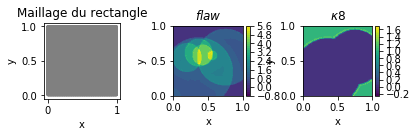

In [34]:
# P_8_2

mesh8 = RectangleMesh(Point(0.0, 0.0), Point(X, Y), nx8, ny8, diagonal="left") 

plt.figure(1)
plt.subplots_adjust(wspace=0.7)
plt.subplot(1, 3, 1)
plt.xlabel('x')
plt.ylabel('y')
plot(mesh8, title="Maillage du rectangle")

x = SpatialCoordinate(mesh8)
flaw = 0.
maxval = 1-1e-8

for i in range(nb_holes):
    flaw = flaw + conditional(lt((x[0]-xcenter[i])**2+(x[1]-ycenter[i])**2, radius[i]**2), maxval, Constant(0))
    
plt.subplot(1, 3, 2)
plk=plot(flaw,title='$flaw$')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(plk,fraction=0.046, pad=0.04)
    
flaw = conditional(gt(flaw,maxval),maxval,flaw)    
kappa8 = kappaadim - flaw
    
plt.subplot(1, 3, 3)
plk=plot(kappa8,title='$\kappa8$')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(plk,fraction=0.046, pad=0.04)

**P.3** Résoudre le problème.

Calling FFC just-in-time (JIT) compiler, this may take some time.


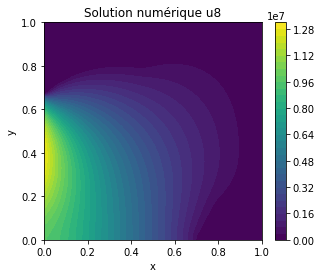

In [35]:
# P_8_3

Hh8 = FunctionSpace(mesh8, 'P', ordre)

class RightEdge8(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (abs(x[0] - 1) < tol) 
    
re8 = RightEdge8()
reD8 = DirichletBC(Hh8, Constant(1.0), re8)

class LeftEdge8(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (abs(x[0] - 0) < tol)
    
leN8 = LeftEdge8()

boundaries8 = MeshFunction("size_t", mesh8, mesh8.topology().dim()-1, 0)

leN8.mark(boundaries8, 1)

ds8 = Measure("ds", domain=mesh8, subdomain_data=boundaries8)
            
u8 = TrialFunction(Hh8)
v8 = TestFunction(Hh8)
l8 = psi*v8*ds8(1)
a8 = kappa8*inner(grad(u8), grad(v8))*dx

u8 = Function(Hh8)

solve(a8 == l8, u8, reD8)

plt.figure(2)
plu8=plot(u8,title='Solution numérique u8')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(plu8,fraction=0.046, pad=0.04)

**P.4** Peut-on encore parler d'invisibilité thermique ?

In [36]:
# P_8_4

influx8 = assemble(Dx(u8,0)*ds8(1))

re8.mark(boundaries8, 2)
outflux8 = assemble(Dx(u8,0)*ds8(2))

print("difference=",abs(outflux8-influx8))

difference= 21998479.959968254


# Conclusion

A vous d'écrire vos propres conclusions...

# Bibliographie

## FEniCS

Documentation : https://fenicsproject.org/documentation/

Getting started : http://www-users.math.umn.edu/~arnold/8445/fenics-getting-started.pdf

UFL : https://fenics.readthedocs.io/projects/ufl/en/latest/manual/form_language.html



## Markdown

https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

